In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from qiskit import IBMQ
from qiskit import pulse
import qiskit.pulse.library as pulse_lib
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor
from scipy.optimize import curve_fit

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backends =provider.backends()

In [3]:
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

In [8]:
backend = provider.get_backend('ibmq_bogota')
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"
dt = backend_config.dt
backend_defaults = backend.defaults()

In [9]:
print(backend_defaults.to_dict())

{'qubit_freq_est': [5.000439828326434, 4.8498692186951935, 4.782943178125407, 4.858092078611781, 4.978357043478192], 'meas_freq_est': [7.272076418, 7.38810926, 7.334793510000001, 7.203996181000001, 7.449439617], 'buffer': 0, 'pulse_library': [{'name': 'QId_d0', 'samples': [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]}, {'name': 'QId_d1', 'samples': [0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0

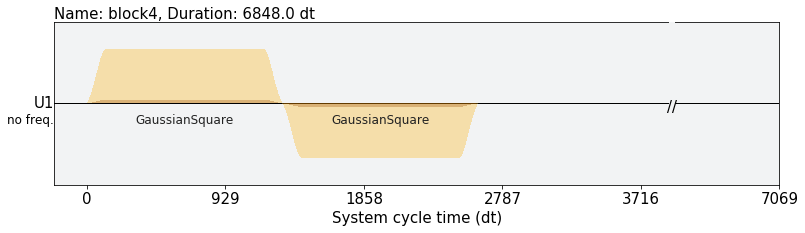

In [19]:
CR_amp = 0.01727847036804097+0.001130437387569118j
CR_duration = 1312
CR_sigma = 64
CR_width = 1056
CR_t = duration + 2*width

DR_amp = -0.0011654092505350173+0.09513198803416907j
DR_beta = -1.2132184305156568
DR_duration = 160
DR_sigma = 40
    

# amp = -0.166
# duration = 720
# sigma = 32
# square_width = 64

# class GaussianSquare(duration, amp, sigma, width, name=None)
cr_p = pulse_lib.GaussianSquare(CR_duration,+CR_amp,CR_sigma,CR_width) 
cr_m = pulse_lib.GaussianSquare(CR_duration,-CR_amp,CR_sigma,CR_width) 
x180 = pulse_lib.Drag(DR_duration,+DR_amp,DR_sigma,DR_beta)

with pulse.build(backend=backend) as CR2:
    pulse.play(cr_p, pulse.ControlChannel(1))
    pulse.delay(CR_t,pulse.DriveChannel(1))
    pulse.Play(x180,pulse.DriveChannel(1))
    pulse.play(cr_m, pulse.ControlChannel(1))
    pulse.delay(CR_t,pulse.DriveChannel(1))
    pulse.Play(x180,pulse.DriveChannel(1))

spec.draw()